# KMeans Clustering ESG



In [5]:
#@title Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas_gbq

In [6]:
from google.colab import auth

In [7]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()


In [8]:

#@title Download Clustering Dataset

# NOTE: this is a test only using the ESG_ONLY table:

# STEP 1: Query BigQuery to get the Before Ticker table for ESG data:
query1 = "SELECT * FROM `lw-esg-project.Enriched_SP500_fin_esg_hybrid.Clustering_dataset`"

df_cluster = pd.read_gbq(query1, project_id = "lw-esg-project")

<ipython-input-8-eed9463078bb>:8: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df_cluster = pd.read_gbq(query1, project_id = "lw-esg-project")


In [9]:
df_cluster.head()

,Ticker,logarithmic cumalative returns 11Y,logarithmic cumalative returns 5Y,logarithmic cumalative returns 1Y,environmentScore,socialScore,governanceScore,esgScore,Sector
0,CVX,0.688360,0.470836,0.093577,19.91,10.61,7.84,38.36,Energy
1,HES,0.760750,0.836892,0.038969,19.37,6.09,6.50,31.97,Energy
2,OKE,1.294824,0.631012,0.416878,9.56,12.28,4.53,26.37,Energy
3,HP,-0.404979,-0.077777,-0.140655,NaN,NaN,NaN,20.42,Energy
4,HAL,-0.446676,0.146714,-0.274371,10.21,6.79,6.84,23.84,Energy


In [10]:
df_cluster.shape

(323, 9)

In [11]:
df_cluster.dropna(how='any',axis=0,inplace=True,ignore_index=True)

In [12]:

df_cluster.isnull().sum()

,0
Ticker,0
logarithmic cumalative returns 11Y,0
logarithmic cumalative returns 5Y,0
logarithmic cumalative returns 1Y,0
environmentScore,0
socialScore,0
governanceScore,0
esgScore,0
Sector,0


In [13]:
#@title creates clustering datasets for 11years, 5years and 1year
df_cluster_one=df_cluster.iloc[:,[0,3,4,5,6,8]]
df_cluster_five=df_cluster.iloc[:,[0,2,4,5,6,8]]
df_cluster_eleven=df_cluster.iloc[:,[0,1,4,5,6,8]]

In [14]:
display(df_cluster_one.head(),df_cluster_five.head(),df_cluster_eleven.head())

,Ticker,logarithmic cumalative returns 1Y,environmentScore,socialScore,governanceScore,Sector
0,CVX,0.093577,19.91,10.61,7.84,Energy
1,HES,0.038969,19.37,6.09,6.50,Energy
2,OKE,0.416878,9.56,12.28,4.53,Energy
3,HAL,-0.274371,10.21,6.79,6.84,Energy
4,EOG,0.173411,21.34,6.51,6.53,Energy


,Ticker,logarithmic cumalative returns 5Y,environmentScore,socialScore,governanceScore,Sector
0,CVX,0.470836,19.91,10.61,7.84,Energy
1,HES,0.836892,19.37,6.09,6.50,Energy
2,OKE,0.631012,9.56,12.28,4.53,Energy
3,HAL,0.146714,10.21,6.79,6.84,Energy
4,EOG,0.681319,21.34,6.51,6.53,Energy


,Ticker,logarithmic cumalative returns 11Y,environmentScore,socialScore,governanceScore,Sector
0,CVX,0.688360,19.91,10.61,7.84,Energy
1,HES,0.760750,19.37,6.09,6.50,Energy
2,OKE,1.294824,9.56,12.28,4.53,Energy
3,HAL,-0.446676,10.21,6.79,6.84,Energy
4,EOG,0.747666,21.34,6.51,6.53,Energy


In [15]:
#@title choose your cluster
df_cluster=df_cluster_one #@param

In [16]:
df_cluster=df_cluster.drop(columns='logarithmic cumalative returns 1Y')

In [17]:
df_cluster[['Ticker','Sector']]

,Ticker,Sector
0,CVX,Energy
1,HES,Energy
2,OKE,Energy
3,HAL,Energy
4,EOG,Energy
...,...,...
316,OMC,Communication Services
317,NFLX,Communication Services
318,GOOGL,Communication Services
319,NWSA,Communication Services


In [18]:
from sklearn.preprocessing import StandardScaler

df_cluster_meta=df_cluster[['Ticker','Sector']]
df_cluster=df_cluster.drop(columns=['Ticker','Sector'])
columns_to_normalize=list(df_cluster.columns) #choose columns to normalize
print(columns_to_normalize)


scaler = StandardScaler()
df_cluster_scaled = pd.DataFrame(scaler.fit_transform(df_cluster[columns_to_normalize]), columns = columns_to_normalize)

df_cluster_scaled

['environmentScore', 'socialScore', 'governanceScore']


,environmentScore,socialScore,governanceScore
0,2.640958,0.428183,1.037969
1,2.536771,-0.895024,0.445147
2,0.644034,0.917067,-0.426390
3,0.769444,-0.690103,0.595565
4,2.916862,-0.772071,0.458419
...,...,...,...
316,-1.159952,-0.130960,0.073527
317,-1.169599,-0.517383,1.139722
318,-0.633227,0.758984,2.086468
319,-1.192751,-1.263883,-0.174219


**Checking suitability of Clustermethod**

In [19]:
# # Elbow method to find optimal number of clusters
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

# inertia = []

# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42, n_init = 1000, init = "k-means++", max_iter = 10000 )
#     # kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
#     kmeans.fit(df_cluster_scaled)
#     inertia.append(kmeans.inertia_)
#     # df_cluster_meta.loc[:,['Cluster']] = kmeans.predict(df_cluster_scaled)
#     # silhouette_avg = silhouette_score(df_cluster_scaled, df_cluster_meta['Cluster'])
#     # print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

# # Plot the elbow curve
# plt.figure(figsize=(8, 6))
# plt.plot(range(2, 11), inertia, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal Clusters')
# plt.show()

In [20]:
df_cluster_scaled

,environmentScore,socialScore,governanceScore
0,2.640958,0.428183,1.037969
1,2.536771,-0.895024,0.445147
2,0.644034,0.917067,-0.426390
3,0.769444,-0.690103,0.595565
4,2.916862,-0.772071,0.458419
...,...,...,...
316,-1.159952,-0.130960,0.073527
317,-1.169599,-0.517383,1.139722
318,-0.633227,0.758984,2.086468
319,-1.192751,-1.263883,-0.174219


In [21]:
from sklearn.cluster import KMeans

# Define the number of clusters

num_clusters = 11

# Fit K-Means
kmeans = KMeans(n_clusters=num_clusters,random_state=42, n_init = "auto",  max_iter = 10000)

# df_cluster_meta.loc[:,['Cluster']]=kmeans.fit_predict(df_cluster_scaled)
kmeans.fit(df_cluster_scaled)
df_cluster_meta.loc[:,['Cluster']]=kmeans.labels_

In [22]:
kmeans.cluster_centers_,kmeans.inertia_,kmeans.labels_

(array([[ 0.53547965,  1.80069378, -0.104133  ],
        [-0.86985549, -0.42668192, -0.19056568],
        [ 0.06008541,  0.24032615, -0.66863332],
        [-0.87653351,  0.36069727,  1.85129533],
        [-0.3133243 , -1.49553285, -0.72068506],
        [ 2.64404534,  1.03826293,  0.74509755],
        [ 2.41551582, -0.29624825, -0.17626107],
        [ 1.00500599,  0.552821  , -0.21497406],
        [-0.82629475,  1.22200912,  0.33734798],
        [-0.84353068,  1.2273761 ,  4.77186422],
        [ 1.00268069, -0.64292892, -0.30188453]]),
 184.72029867572394,
 array([ 5,  6,  7, 10,  6,  6,  2, 10,  6,  5,  6,  6,  6,  2,  6,  2,  7,
         7,  2, 10, 10,  2,  1,  7,  2,  7, 10, 10,  7,  7, 10,  0,  6,  7,
        10,  2, 10,  7, 10,  2,  6,  8,  8,  8,  8,  8,  8,  8,  4,  8,  8,
         4,  8,  1,  7,  1,  3,  8,  1,  8,  8,  1,  8,  8,  8,  8,  8,  1,
         1,  1,  8,  8,  8,  8,  8,  4,  1,  1,  1,  1,  1,  4, 10,  2,  4,
         4,  4,  4,  4,  4,  1,  2,  2, 10,  3,  4,  1,  1

<Axes: xlabel='Cluster', ylabel='count'>

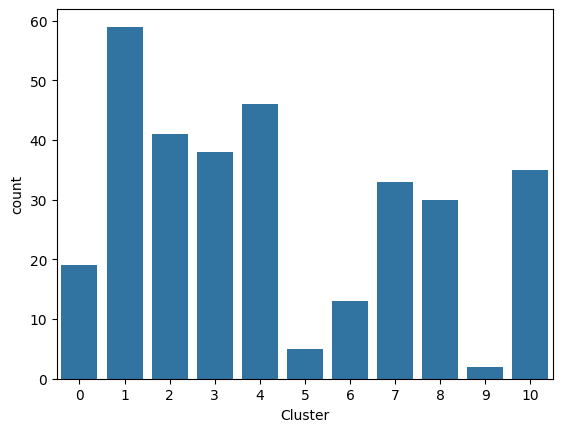

In [23]:
import seaborn as sns
sns.countplot(df_cluster_meta, x='Cluster')


In [24]:
df_cluster_meta.shape,df_cluster_scaled.shape

((321, 3), (321, 3))

In [25]:
df_cluster_final=pd.concat([df_cluster_scaled,df_cluster_meta],axis=1)

In [26]:
df_cluster_final.iloc[:,[0,1,2]]=df_cluster_final.iloc[:,[0,1,2]]*-1

In [27]:
df_cluster_final

,environmentScore,socialScore,governanceScore,Ticker,Sector,Cluster
0,-2.640958,-0.428183,-1.037969,CVX,Energy,5
1,-2.536771,0.895024,-0.445147,HES,Energy,6
2,-0.644034,-0.917067,0.426390,OKE,Energy,7
3,-0.769444,0.690103,-0.595565,HAL,Energy,10
4,-2.916862,0.772071,-0.458419,EOG,Energy,6
...,...,...,...,...,...,...
316,1.159952,0.130960,-0.073527,OMC,Communication Services,1
317,1.169599,0.517383,-1.139722,NFLX,Communication Services,3
318,0.633227,-0.758984,-2.086468,GOOGL,Communication Services,3
319,1.192751,1.263883,0.174219,NWSA,Communication Services,1


In [28]:
import plotly

In [29]:
dictsect=dict(zip(list(df_cluster_final.groupby(by='Sector')['Cluster'].mean().reset_index().Sector),[1,2,3,4,5,6,7,8,9,10,11]))
dictsect

{'Basic Materials': 1,
 'Communication Services': 2,
 'Consumer Cyclical': 3,
 'Consumer Defensive': 4,
 'Energy': 5,
 'Financial Services': 6,
 'Healthcare': 7,
 'Industrials': 8,
 'Real Estate': 9,
 'Technology': 10,
 'Utilities': 11}

In [30]:
sector_num=[dictsect[i] for i in df_cluster_final['Sector']] #not used

In [31]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

color_range1='HSV'
color_range2='mygbm'
back_rgb='rgb(32,33,36)'
# back_rgb='rgb(44, 47, 56)'

# Create the first 3D scatter plot
fig1 = px.scatter_3d(df_cluster_final,
                      x='environmentScore',
                      y="socialScore",
                      z='governanceScore',
                      color='Cluster',
                      title="First 3D Scatter Plot"
                      )


# Create the second 3D scatter plot
fig2 = px.scatter_3d(df_cluster_final,
                      x='environmentScore',
                      y="socialScore",
                      z='governanceScore',
                      color='Sector',
                      title="Second 3D Scatter Plot (Alternate View)"
                      )
fig1.update_traces(marker=dict(colorscale=color_range1, coloraxis="coloraxis1"))
fig2.update_traces(marker=dict(colorscale=color_range2, coloraxis="coloraxis2"), showlegend=False)



# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
                    subplot_titles=("11 Machine Learning Clusters", "11 Different Financial Sectors"))
# fig.update_layout(
#     coloraxis=dict(colorscale=color_range)
# )
fig.update_layout(
    coloraxis1=dict(colorscale=color_range1, colorbar=dict(title="Cluster Color Scale")),
    coloraxis2=dict(colorscale=color_range2, colorbar=dict(title="Sector Color Scale"))
)
for trace in fig1.data:
    trace.marker.coloraxis = "coloraxis1"  # Use shared color axis
    fig.add_trace(trace, row=1, col=1)

for trace in fig2.data:
    trace.marker.coloraxis = "coloraxis2"  # Use shared color axis
    fig.add_trace(trace, row=1, col=2)

offset = 5  # Adjust this value to control how far away the labels are


# Calculate and add cluster labels
cluster_centroids = df_cluster_final.groupby('Cluster').agg({
    'environmentScore': 'mean',
    'socialScore': 'mean',
    'governanceScore': 'mean'
}).reset_index()

# Add text labels for cluster centroids
for _, centroid in cluster_centroids.iterrows():
    fig.add_trace(
        go.Scatter3d(
            x=[centroid['environmentScore']*(offset+1),centroid['environmentScore']],
            y=[centroid['socialScore']*(offset+1),centroid['socialScore']],
            z=[centroid['governanceScore']*(offset+1),centroid['governanceScore']],
            mode='lines+markers+text',
            text=[f'Cluster {int(centroid["Cluster"])}'],
            textposition='top center',
            textfont=dict(color='white', size=15),
            showlegend=False
        ),
        row=1, col=1
    )




# Calculate and add sector labels
sector_centroids = df_cluster_final.groupby('Sector').agg({
    'environmentScore': 'mean',
    'socialScore': 'mean',
    'governanceScore': 'mean'
}).reset_index()



# Add text labels for sector centroids
for _, centroid in sector_centroids.iterrows():
    fig.add_trace(
        go.Scatter3d(
            x=[centroid['environmentScore']*(offset+1),centroid['environmentScore']],
            y=[centroid['socialScore']*(offset+1),centroid['socialScore']],
            z=[centroid['governanceScore']*(offset+1),centroid['governanceScore']],
            mode='lines+markers+text',
            text=[centroid["Sector"]],
            textposition='top center',
            textfont=dict(color='white', size=15),
            showlegend=False
        ),
        row=1, col=2
    )
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# offset = 0.1  # Adjust this value to control how far away the labels are

# # For clusters (in the first trace adding section):
# x_label = centroid['environmentScore'] + offset
# y_label = centroid['socialScore'] + offset
# z_label = centroid['governanceScore'] + offset

# # Then use these coordinates for the text position, and add a line:
# fig.add_trace(
#     go.Scatter3d(
#         x=[centroid['environmentScore'], x_label],  # Line from centroid to label
#         y=[centroid['socialScore'], y_label],
#         z=[centroid['governanceScore'], z_label],
#         mode='lines+text',
#         text=['', f'Cluster {centroid["Cluster"]}'],  # Empty text at start of line
#         textposition='middle center',
#         textfont=dict(color='white', size=12),
#         line=dict(color='white', width=2),
#         showlegend=False
#     ),
#     row=1, col=1
# )

#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Define common scene settings for both plots
scene_settings = dict(
    xaxis=dict(
        gridcolor="white",
        backgroundcolor=back_rgb,
        showbackground=True,
        color="white",
        tickcolor="white",
        tickfont=dict(size=15,color="white"),
        title=dict(text="Environment Score", font=dict(color="white"))
    ),
    yaxis=dict(
        gridcolor="white",
        backgroundcolor=back_rgb,
        showbackground=True,
        color="white",
        tickcolor="white",
        tickfont=dict(size=15,color="white"),
        title=dict(text="Social Score", font=dict(color="white"))
    ),
    zaxis=dict(
        gridcolor="white",
        backgroundcolor=back_rgb,
        showbackground=False,
        color="white",
        tickcolor="white",
        tickfont=dict(size=15,color="white"),
        title=dict(text="Governance Score", font=dict(color="white"))
    )
)

# Apply layout settings
fig.update_layout(
    width=1600, height=1600,
    title_text="3D Scatter Plots Side by Side",
    paper_bgcolor=back_rgb,
    plot_bgcolor=back_rgb,
    scene1=scene_settings,
    scene2=scene_settings,
    coloraxis_showscale=True,
    font=dict(color="white")  # Ensure all text elements are white

        )

# Create slider for camera angle
camera_slider = {
    'active': 0,
    'currentvalue': {'prefix': 'Camera Angle: '},
    'pad': {'t': 50},
    'steps': []
}

# Generate camera positions for different angles
n_frames = 5000
for i in range(n_frames):
    angle = i * (360 / n_frames)
    angle2 = i * (180 / n_frames)
    radius = 2.2
    x = radius * np.sin(np.radians(angle2)) * np.cos(np.radians(angle))
    y = radius * np.sin(np.radians(angle2)) * np.sin(np.radians(angle))
    z = radius * np.cos(np.radians(angle2))

    camera = dict(
        eye=dict(x=x, y=y, z=z),
        center=dict(x=0, y=0, z=0),
        up=dict(x=0, y=0, z=1)
    )

    step = {
        'method': 'relayout',
        'label': f'{angle:.0f}°',
        'args': [
            {
                'scene.camera': camera,
                'scene2.camera': camera
            }
        ]
    }
    camera_slider['steps'].append(step)

# Update layout with slider and other settings
fig.update_layout(
    height=600,
    sliders=[camera_slider],
    scene=dict(
        camera=dict(
            eye=dict(x=2, y=0, z=1.5),
            center=dict(x=0, y=0, z=0),
            up=dict(x=0, y=0, z=1)
        )
    ),
    scene2=dict(
        camera=dict(
            eye=dict(x=2, y=0, z=1.5),
            center=dict(x=0, y=0, z=0),
            up=dict(x=0, y=0, z=1)
        )
    )
)

fig.update_layout(
    # coloraxis=dict(colorscale=color_range2) # changes both to the same colour
)
fig.update_layout(
    width=2000,  # Increase width (default ~700)
    height=1000,  # Increase height (default ~450)
    showlegend=False
)
# Show the combined figure
fig.show()

#colours
#labels
#video
#success


Output hidden; open in https://colab.research.google.com to view.